## Feature Engineering - Rolling Mean, Std, Data Smoothening - (dataset )

### Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("AirPassengersImpute.csv")
data.head()

Unnamed: 0      x
0           1  112.0
1           2  118.0
2           3  132.0
3           4  129.0
4           5  121.0

(array([[63., 62., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  9., 29., 28., 16., 21., 16.,  7.,  4.,  2.]]),
 array([  1. ,  63.1, 125.2, 187.3, 249.4, 311.5, 373.6, 435.7, 497.8,
        559.9, 622. ]),
 <a list of 2 BarContainer objects>)

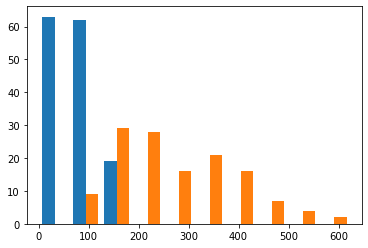

In [3]:
plt.hist(data)

### Imputation

In [4]:
threshold = 0.5
data = data.loc[data.isnull().mean(axis=1) < threshold]
data

Unnamed: 0      x
0             1  112.0
1             2  118.0
2             3  132.0
3             4  129.0
4             5  121.0
..          ...    ...
137         138  535.0
138         139  622.0
139         140  606.0
142         143  390.0
143         144  432.0

[132 rows x 2 columns]

In [5]:
data = data[data.columns[data.isnull().mean() < threshold]]


### Numerical Imputation

In [6]:
data = data.fillna(0)

In [7]:
data = data.fillna(data.median())

In [8]:
data

Unnamed: 0      x
0             1  112.0
1             2  118.0
2             3  132.0
3             4  129.0
4             5  121.0
..          ...    ...
137         138  535.0
138         139  622.0
139         140  606.0
142         143  390.0
143         144  432.0

[132 rows x 2 columns]

### Categorical Imputation

In [10]:
data['x'].fillna(data['x'].value_counts()
.idxmax(), inplace=True)


### Outlier Detection using STD

{'whiskers': [<matplotlib.lines.Line2D at 0x166418f8a60>,
 'caps': [<matplotlib.lines.Line2D at 0x16641902160>,
 'boxes': [<matplotlib.lines.Line2D at 0x166418f8700>,
 'medians': [<matplotlib.lines.Line2D at 0x16641902820>,
 'fliers': [<matplotlib.lines.Line2D at 0x16641902b80>,
 'means': []}

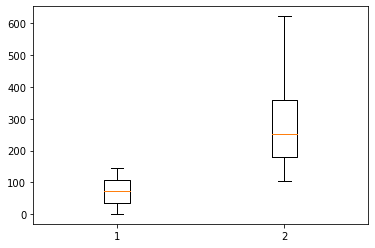

In [11]:
factor = 3
upper_lim = data['x'].mean () + data['x'].std () * factor
lower_lim = data['x'].mean () - data['x'].std () * factor

data = data[(data['x'] < upper_lim) & (data['x'] > lower_lim)]

plt.boxplot(data)

### Outlier Detection using Percentiles

In [12]:
upper_lim = data['x'].quantile(.95)
lower_lim = data['x'].quantile(.05)

data = data[(data['x'] < upper_lim) & (data['x'] > lower_lim)]

### Binning

In [13]:
data['bin'] = pd.cut(data['x'], bins=[100,300,500,700], labels=["Low", "Mid", "High"])
data['bin']

2      Low
3      Low
4      Low
5      Low
6      Low
      ... 
134    Mid
135    Mid
136    Mid
142    Mid
143    Mid
Name: bin, Length: 118, dtype: category
Categories (3, object): ['Low' < 'Mid' < 'High']

### Log Transform

In [14]:
data['log+1'] = (data['x']+1).transform(np.log)
data['log+1']

2      4.890349
3      4.867534
4      4.804021
5      4.912655
6      5.003946
         ...   
134    6.040255
135    6.135565
136    6.159095
142    5.968708
143    6.070738
Name: log+1, Length: 118, dtype: float64

In [15]:
data['log'] = (data['x']-data['x'].min()+1) .transform(np.log)
data['log']

2      2.484907
3      2.197225
4      0.000000
5      2.708050
6      3.332205
         ...   
134    5.700444
135    5.831882
136    5.863631
142    5.598422
143    5.743003
Name: log, Length: 118, dtype: float64